# Using Gemini API with Image Prompts in Google Colab

This guide demonstrates how to use the **Gemini API** with image prompts, leveraging Google Colab for an efficient workflow.

---

## **1. Install Required Libraries**
Install the necessary Python libraries:
- `google-generativeai` for API interaction.
- `requests` and `Pillow` for image processing.

In [2]:
!pip install --upgrade --quite google--generativeai


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --quite


In [3]:
!pip install requests Pillow


## **2. Fetch and Configure the API Key**
Retrieve the API key securely using the `userdata` module in Google Colab:

### Explanation:
- The `userdata` module securely retrieves user-specific data, like the API key.
- Ensure you have set the `GEMINI_API_KEY` in your Colab environment before running the script.


In [4]:
# Import the `userdata` module from `google.colab` to access user-specific data.
from google.colab import userdata


GEMINI_API_KEY: str = userdata.get('Apikey')

# Check if the API key was successfully retrieved.
if GEMINI_API_KEY:
  # If the key is found, print a success message.
  print("API key fetched successfully!")
else:
  # If the key is not found, print an error message and instructions for the user.
  print("API key not found. Please set the 'GEMINI_API_KEY' user data.")

API key fetched successfully!


## **3. Import Libraries and Configure the Model**  
Set up the generative AI model for interaction:

### Explanation:  
- `google.generativeai` is used to interact with the Gemini API.  
- The `GenerativeModel` class initializes the `gemini-1.5-flash` model for use.  


In [5]:
# Import the genai module for API interaction
import google.generativeai as genai

# Configure it with your api key
genai.configure(api_key=GEMINI_API_KEY)


In [6]:

from google.generativeai.generative_models import GenerativeModel

model: GenerativeModel = genai.GenerativeModel("gemini-1.5-flash")

In [7]:
from google.generativeai.types.generation_types import GenerateContentResponse


## **4. Download and Display the Image**  
Use the `curl` command to download the image and display it:

### Explanation:  
- The image is fetched and saved as `image.jpg` using `curl`.  
- `Pillow` is used to open and display the image within Colab.  


In [8]:
!curl -o image.jpg "https://images.squarespace-cdn.com/content/v1/58764bfdb3db2b3e1ed14061/d081d72e-8acb-4682-b5ed-097692369efa/IMG_4072.jpeg?format=1500w"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  610k  100  610k    0     0  1104k      0 --:--:-- --:--:-- --:--:-- 1104k


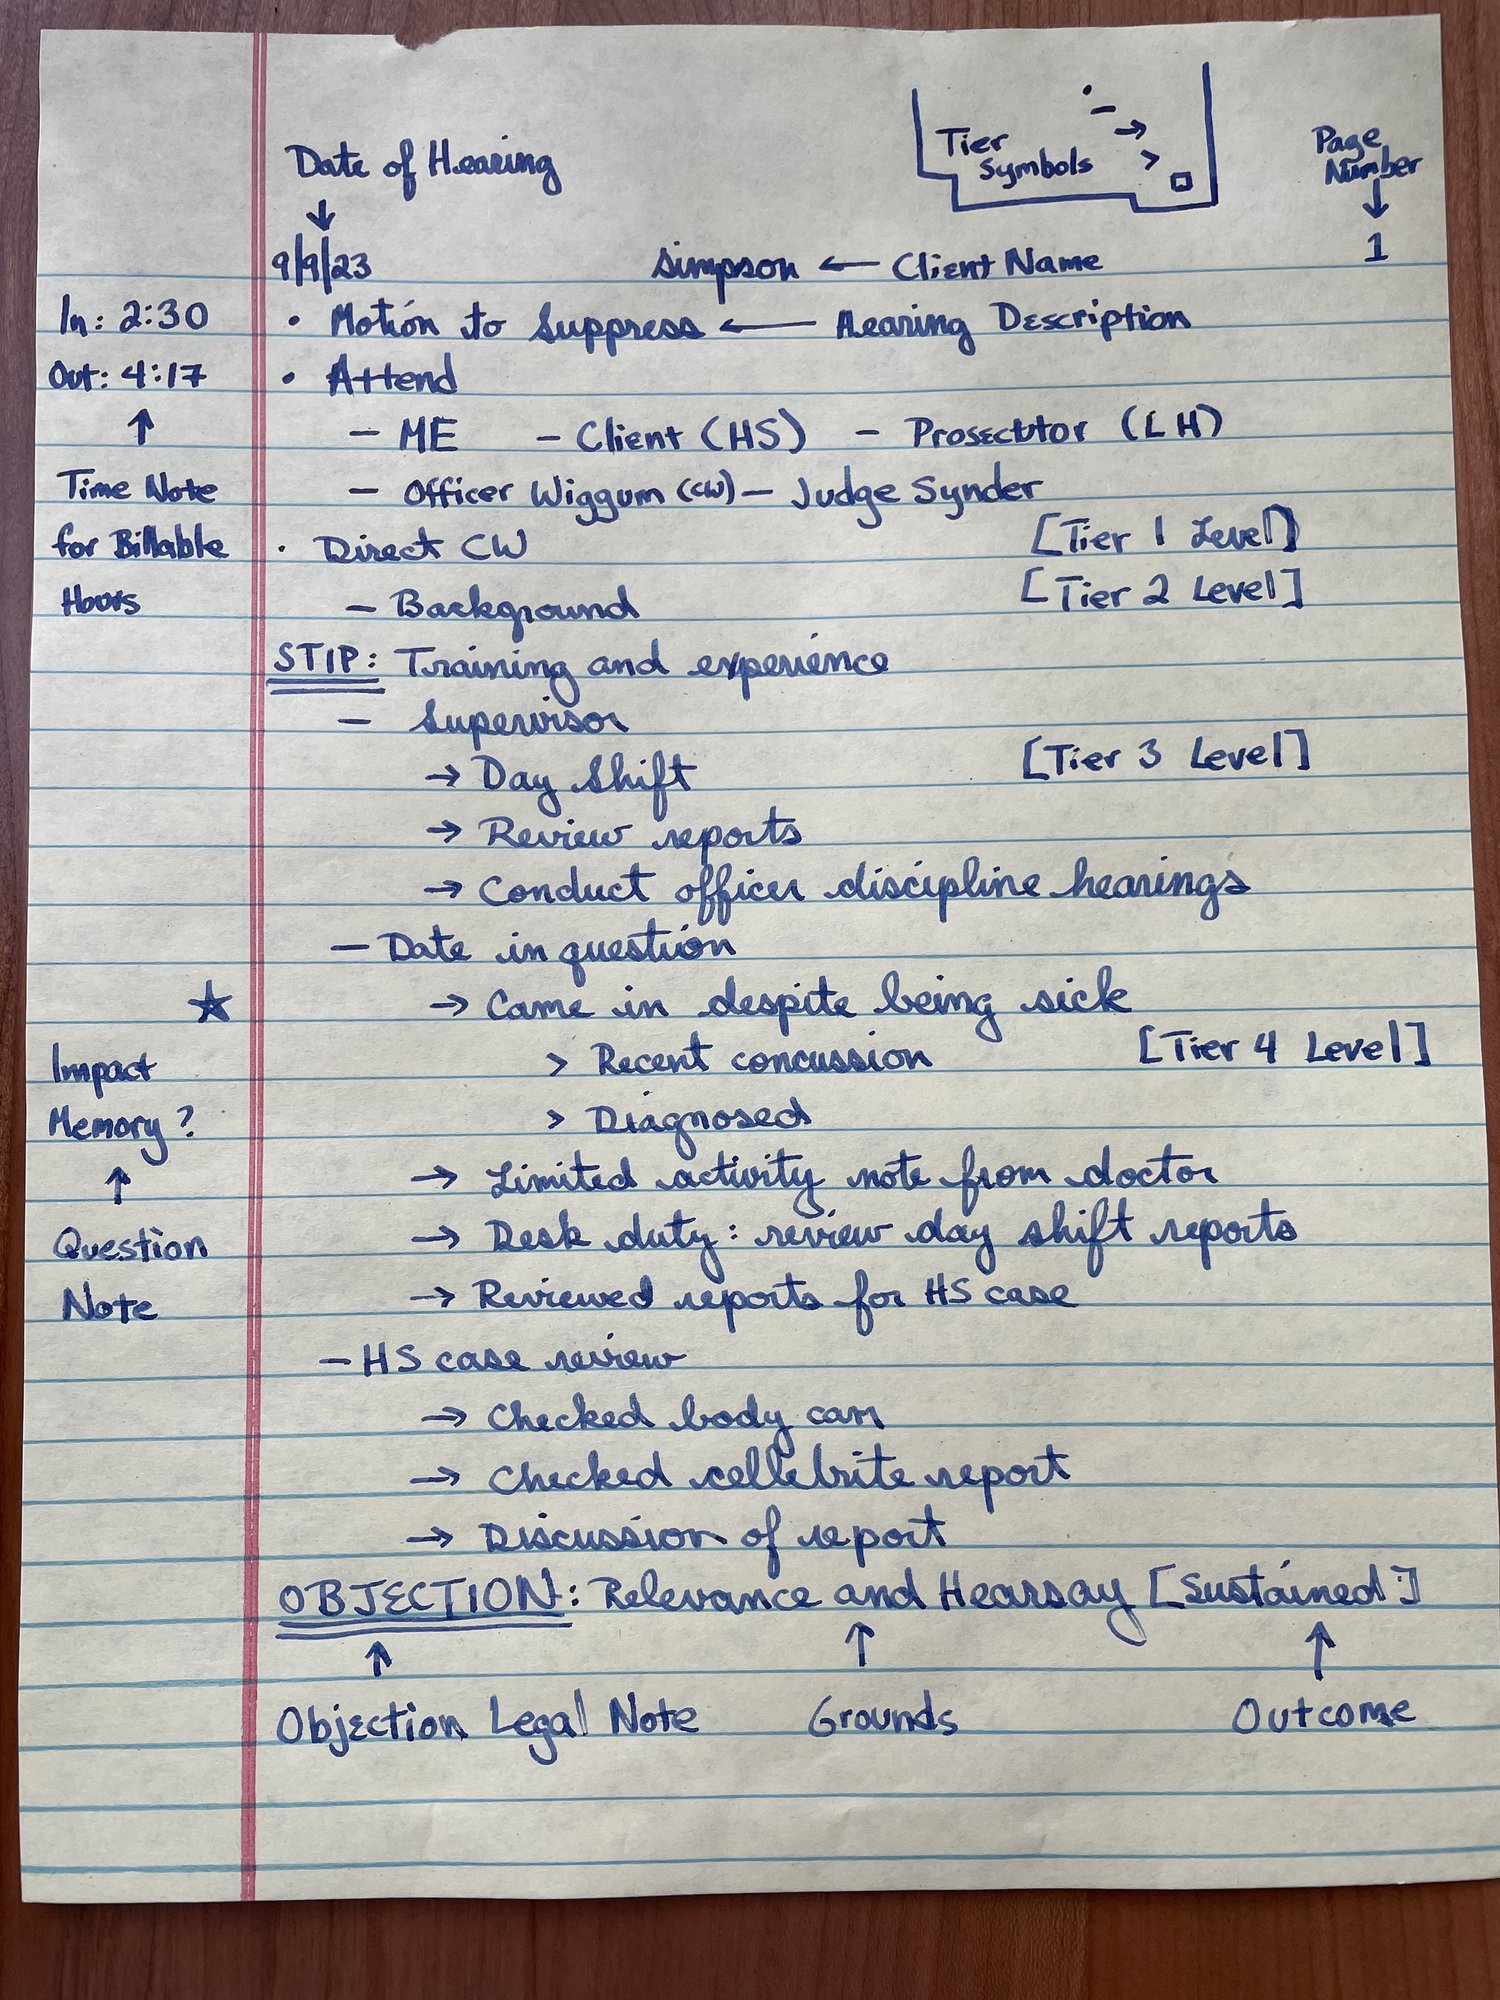

In [9]:
# Display the downloaded image
import PIL.Image
img = PIL.Image.open('image.jpg')
display(img)


## **5. Define the Prompt and Generate Content**  
Create a prompt to analyze the image and generate content using the Gemini model:

### Explanation:  
- The prompt asks the model to describe the image and extract its features in JSON format.  
- The `generate_content` function sends the prompt and image to the API for processing.  


In [10]:
# Write a prompt and store it in some variable
prompt = """This image contains a sketch of a potential product along with some notes.
Given the product sketch, describe the product as thoroughly as possible based on what you
see in the image, making sure to note all of the product features. Return output in json format:
{description: description, features: [feature1, feature2, feature3, etc]}"""

In [11]:
response: GenerateContentResponse = model.generate_content([prompt, img])
print(response.text)


```json
{
  "description": "This is a sketch of a legal case note, possibly for a hearing related to a motion to suppress evidence. The note includes the date and time of the hearing, the names of involved parties (client, prosecutor, judge, officer), and a tiered system to organize different levels of information regarding the case's details.  It appears to document the background of the case, the process of investigating it, the objections made during the hearing, and the outcome of these objections. The sketch in the upper right suggests a system for organizing information or case details using tiers and page numbers.",
  "features": [
    "Date and time of hearing",
    "Client name (Simpson)",
    "Client's attorney (HS)",
    "Prosecutor (LH)",
    "Officer (Wiggum)",
    "Judge (Synder)",
    "Motion to suppress evidence",
    "Witness testimony (Direct CW)",
    "Case background information",
    "Training and experience of involved parties",
    "Officer's day shift activities

## **6. Configure the Model with Parameters**  
Add advanced configuration for the model:

### Explanation:  
- `max_output_tokens` sets the maximum length of the output.  
- `temperature` controls the randomness in responses (higher values = more creative).  


In [18]:
# Define a model and also include some parameters
model: GenerativeModel = genai.GenerativeModel(
    'gemini-1.5-flash',
    generation_config=genai.GenerationConfig(
        max_output_tokens=20,
        temperature=0.7,
    ))

# Write a prompt and store it in some variable
prompt = """This image contains a sketch of a potential product along with some notes.
Given the product sketch, describe the product as thoroughly as possible based on what you
see in the image, making sure to note all of the product features. Return output in json format:
{description: description, features: [feature1, feature2, feature3, etc]}"""

## **7. Run and Analyze the Prompt Again**  
Resend the prompt with the configured model:

### Explanation:  
- The prompt is processed again, now considering the updated model parameters.  
- The output contains the description and features extracted from the image in JSON format.  


In [19]:
response: GenerateContentResponse = model.generate_content([prompt, img])
print(response.text)


```json
{
  "description": "This sketch depicts a system for organizing and referencing legal


# Efficient Workflow Summary

1. **Set Up API**: Obtain API key and endpoint.  
2. **Prepare Image**: Resize and encode using Pillow.  
3. **Configure Prompt**: Define parameters and construct payload.  
4. **Send Request**: Use requests to interact with the API.  
5. **Handle Response**: Process API output or errors efficiently.  

This method ensures clear and efficient setup for using image prompts with the Gemini API.
